<a href="https://colab.research.google.com/github/AnanyaSharma2/MachineLearning/blob/main/linearRegression/LineraRegressionModelFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df =pd.read_csv("/content/data_for_lr.csv")

In [ ]:
df.head(5)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


## **Data Cleaning**

Checking duplicates

In [ ]:
df.duplicated().sum()

0

Handling null Values

In [ ]:
df.isna().sum()

x    0
y    1
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(699, 2)

# **Splitting the data for traing and testing **

Train dataset

In [ ]:
train_input   = np.array(df.x[0:500]).reshape(500,1)
train_output  = np.array(df.y[0:500]).reshape(500,1)

Test dataset

In [ ]:
test_input   = np.array(df.x[500:700]).reshape(199,1)
test_output  = np.array(df.y[500:700]).reshape(199,1)

# **Linear Regression Model**

Forward Propagation  f(x)= m*x+c

In [ ]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

Cost function  sum(1/2n*(y-f(x)**2))

In [ ]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

## **Gradien Descent **

In [ ]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

Parameter Updation



*   m = m -(learning_rate *dm)
*   c = c -(learning_rate *dc)






In [ ]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

Model Train

In [ ]:
def train(train_input, train_output, learning_rate, iters):

    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1

    plt.figure(figsize=(1,1))

    #loss
    loss = list()

    #iterate
    for i in range(iters):

        #forward propagation
        predictions = forward_propagation(train_input, parameters)

        #cost function
        cost = cost_function(predictions, train_output)

        #append loss and print
        loss.append(cost)
        title = "Iteration : "+str(i+1) +"  " + "Loss : " +str(cost)

        #plot function
        fig, ax = plt.subplots()

        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()

        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')
        plt.title(title)

        plt.show()

        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)

        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters, loss

Training

<Figure size 100x100 with 0 Axes>

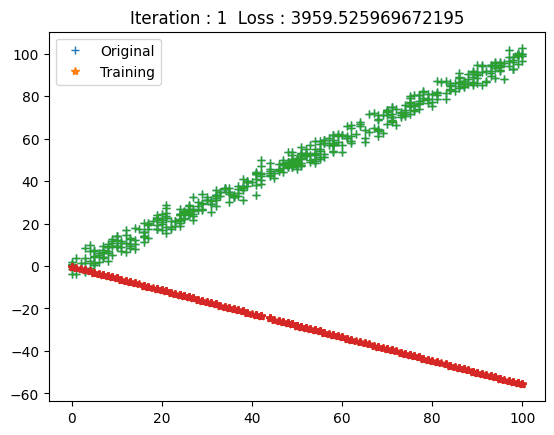

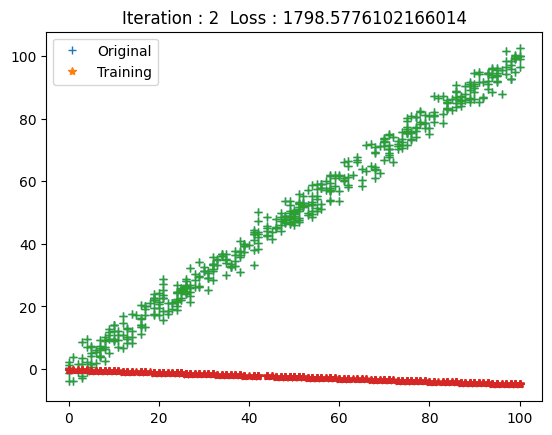

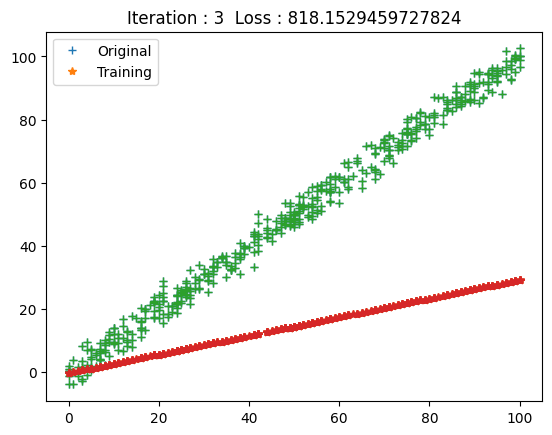

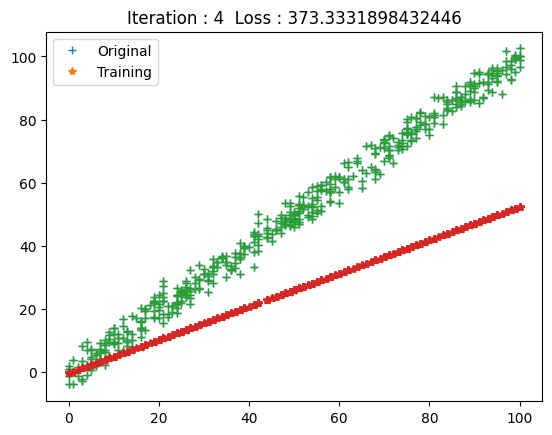

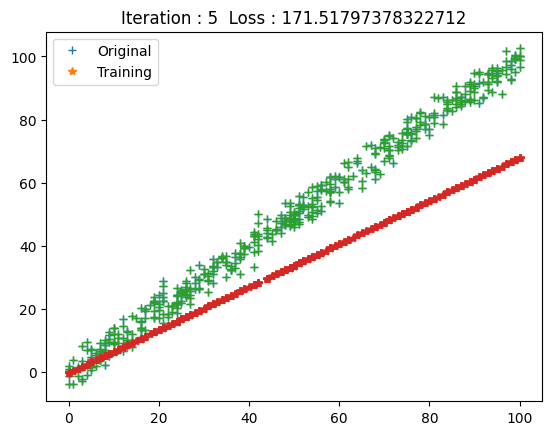

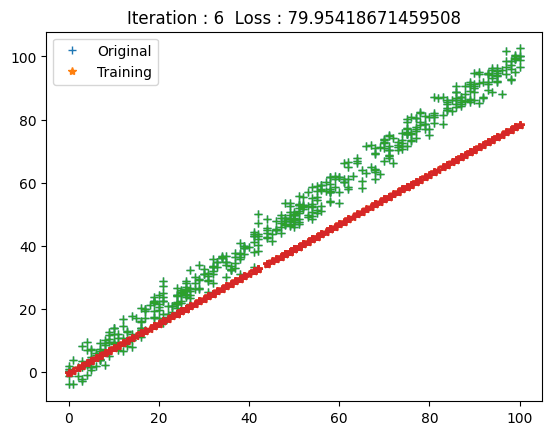

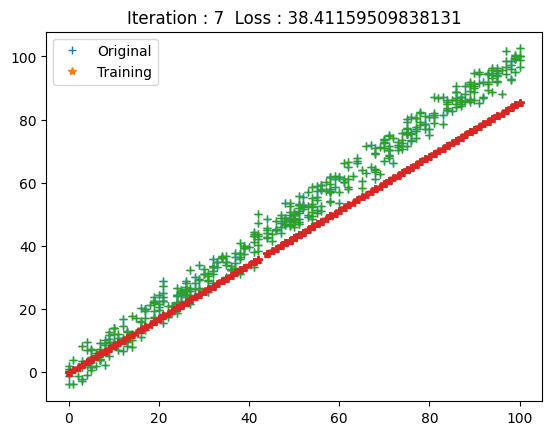

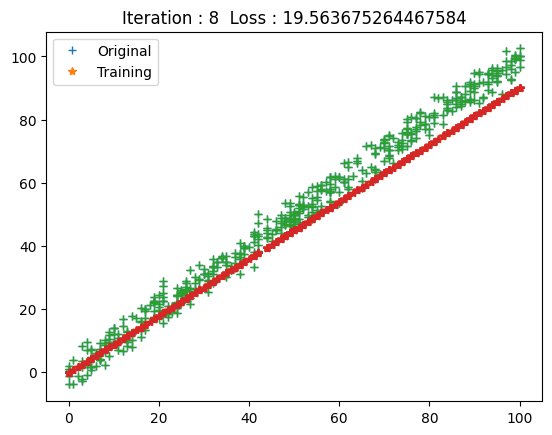

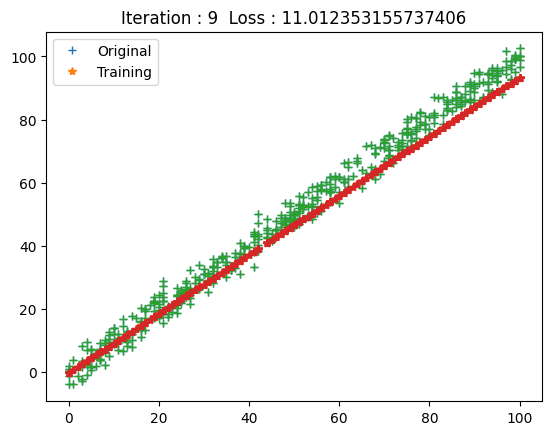

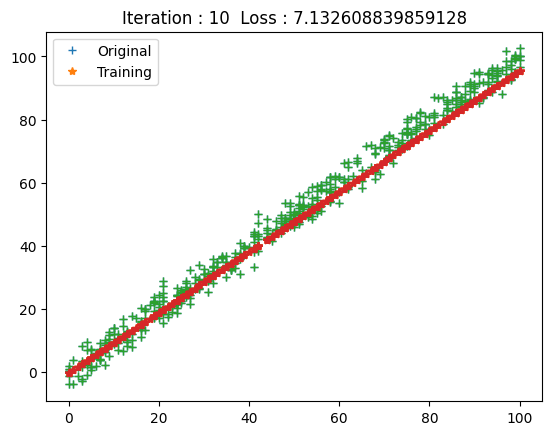

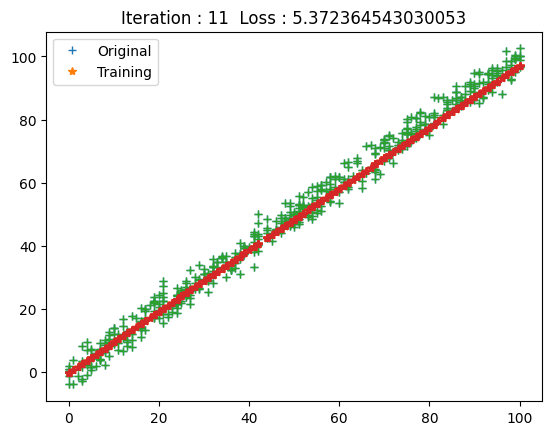

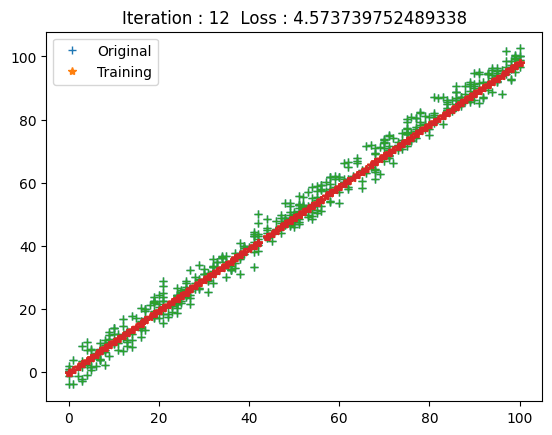

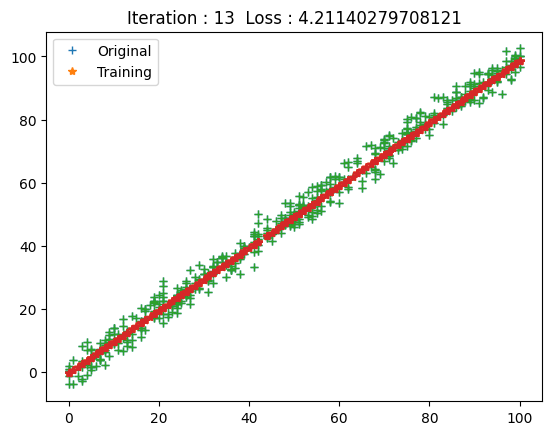

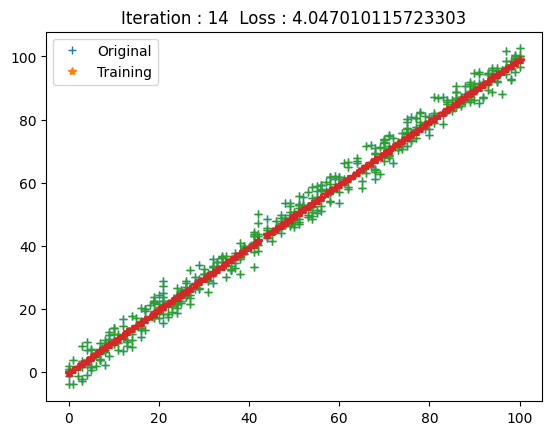

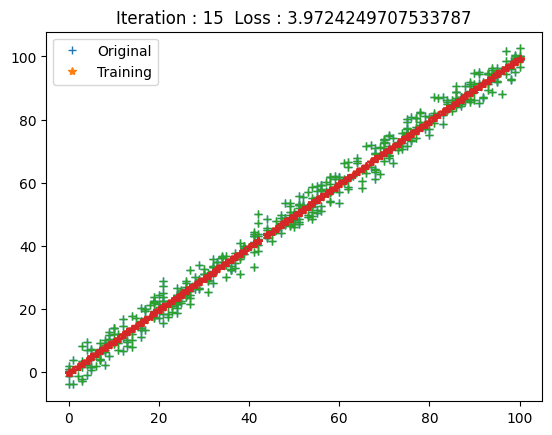

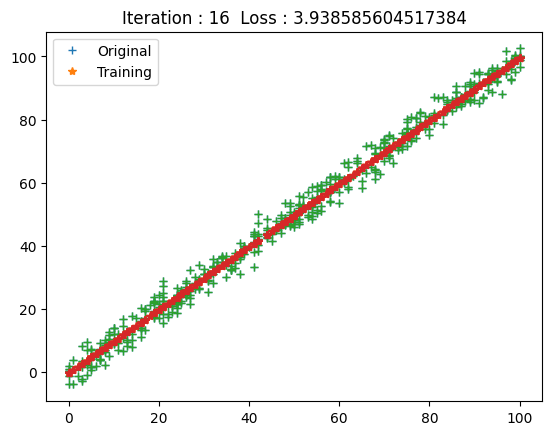

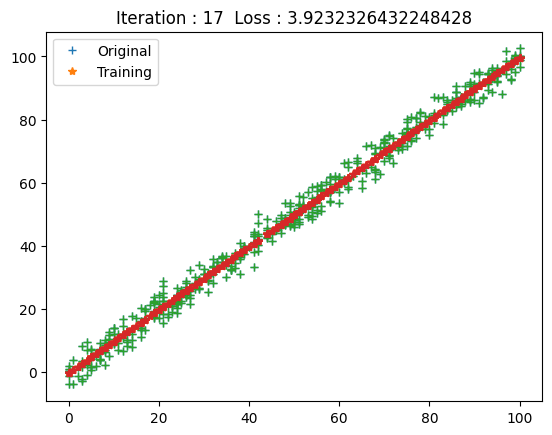

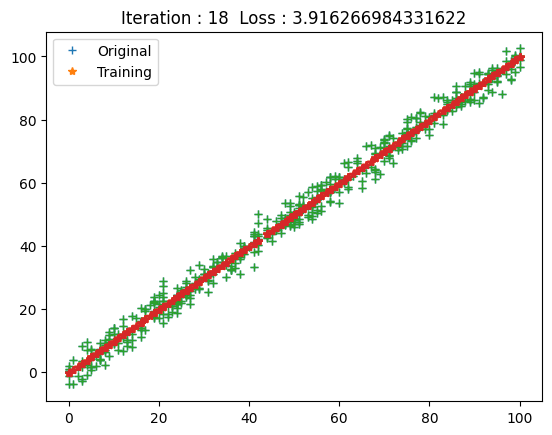

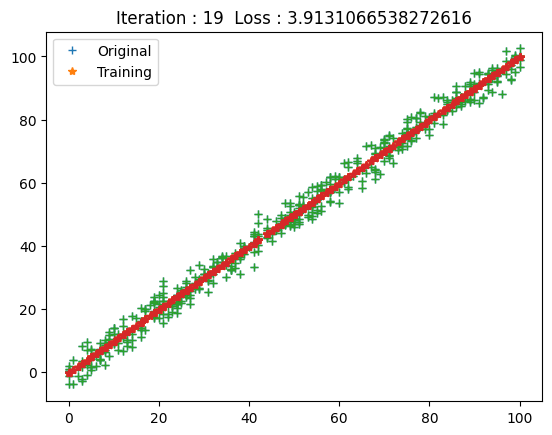

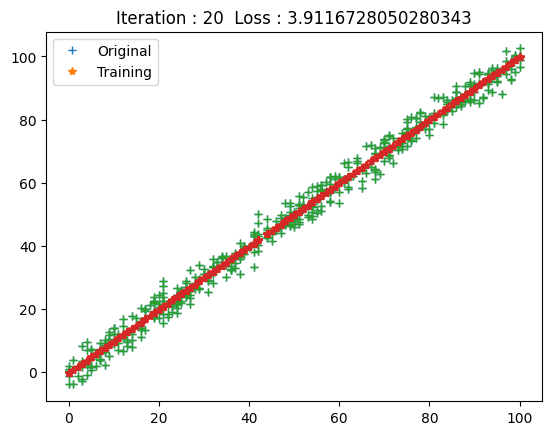

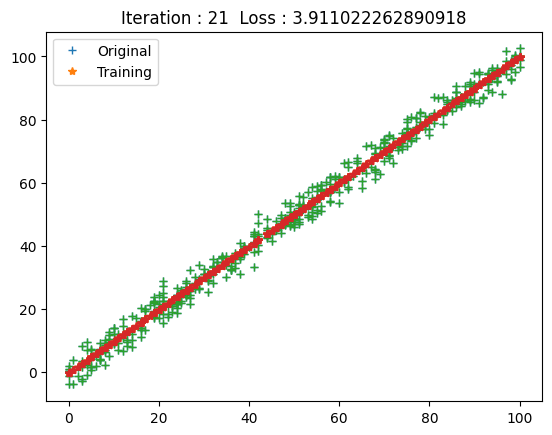

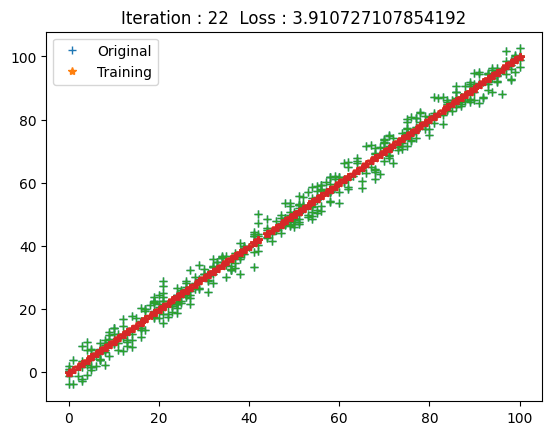

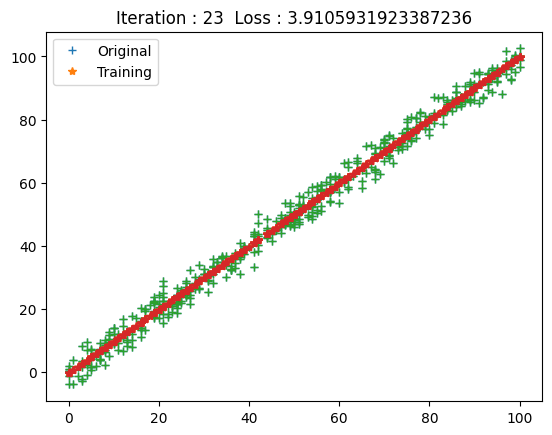

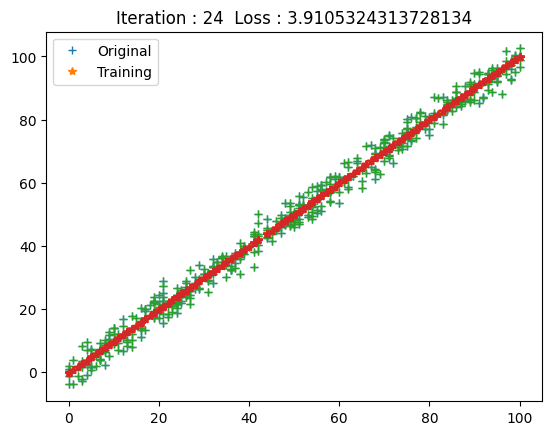

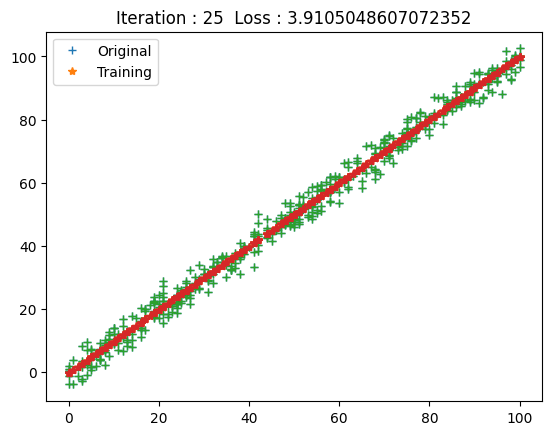

In [ ]:
parameters, loss = train(train_input, train_output, 0.0001, 25)

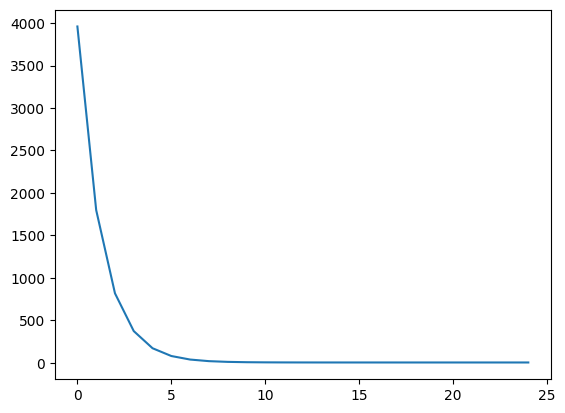

In [ ]:
plt.plot(loss)

### **Model Prediction**

In [ ]:
test_predictions = test_input *parameters['m']+parameters['c']

In [ ]:
plt.plot()

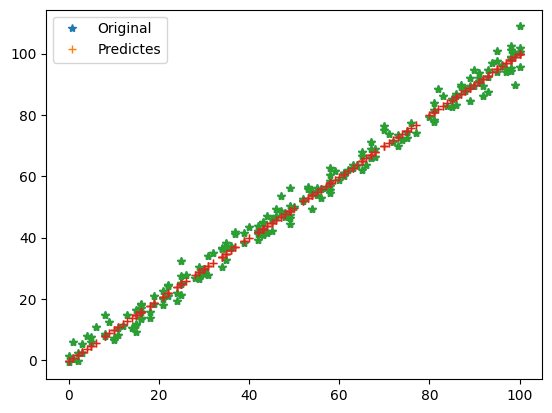

In [ ]:
fig, ax = plt.subplots()
ax.plot(test_input, test_output, '*', label='Original')
ax.plot(test_input,test_predictions, '+', label='Predictes')


legend = ax.legend()
plt.plot(test_input,test_output, '*')
plt.plot(test_input,test_predictions, '+')
plt.show()